
Valeurs manquantes par colonne :
             Missing Values  Percentage
LotFrontage             259   17.764060
MasVnrArea                8    0.548697
Aucune colonne catégorielle à imputer.

Nombre d'outliers par colonne :
LotFrontage                 122
LotArea                     127
LotShape                      9
LandContour                 147
LotConfig                    98
                           ... 
Exterior1st_Stucco           24
Exterior1st_Wd Sdng         206
Exterior1st_WdShing          26
CentralAir_N                 95
CentralAir_Y                 95
Length: 159, dtype: int64


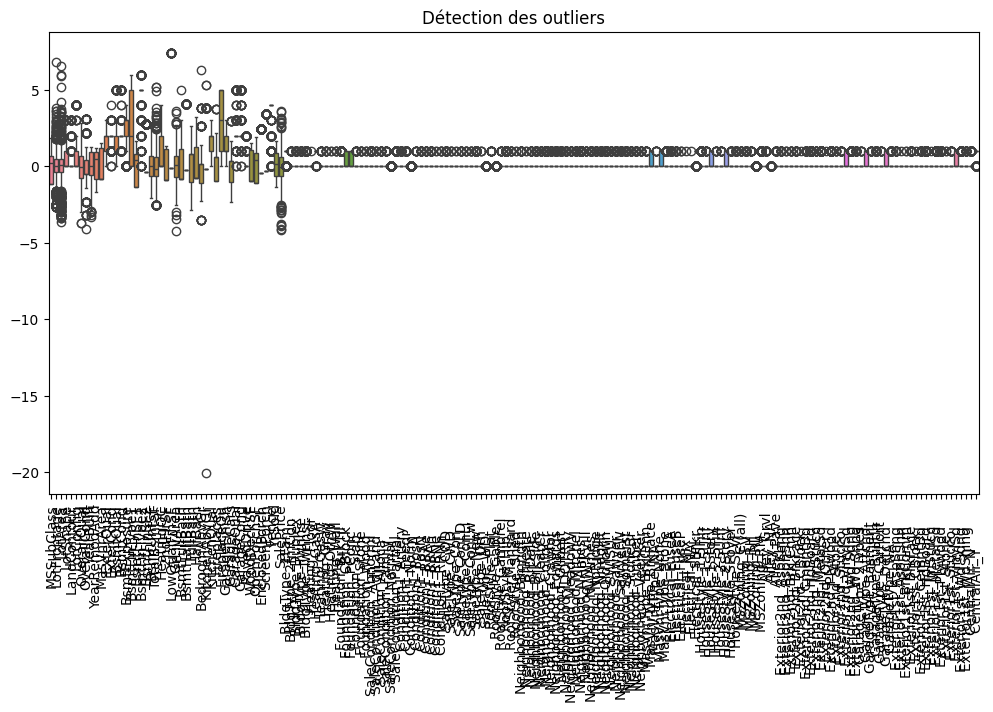


Asymétrie des variables numériques :
LotShape                    1.285160
LandContour                 3.475532
LotConfig                   2.424413
ExterCond                  -1.394028
BsmtQual                    1.293229
                              ...   
Exterior1st_Stucco          7.600443
Exterior1st_Wd Sdng         2.059662
Exterior1st_WdShing         7.286637
CentralAir_N                3.523786
CentralAir_Y               -3.523786
Length: 148, dtype: float64


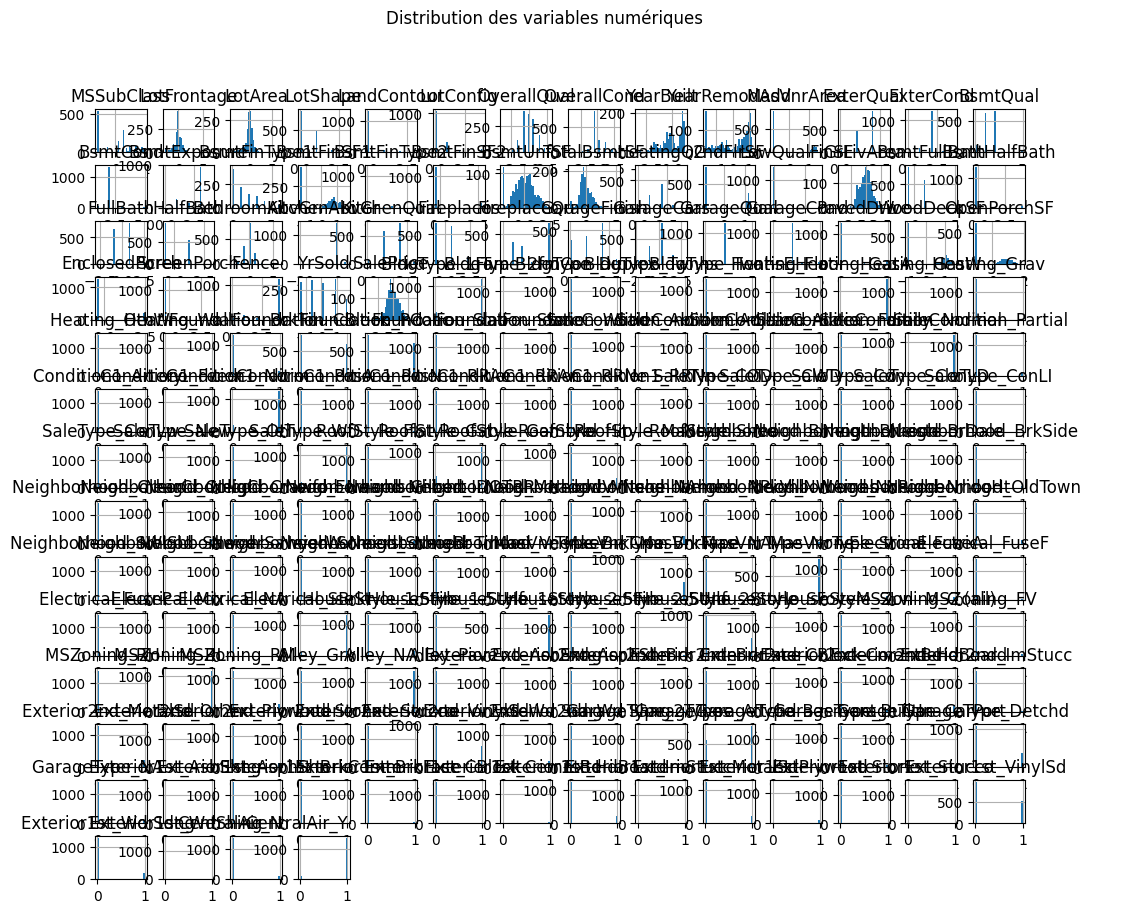

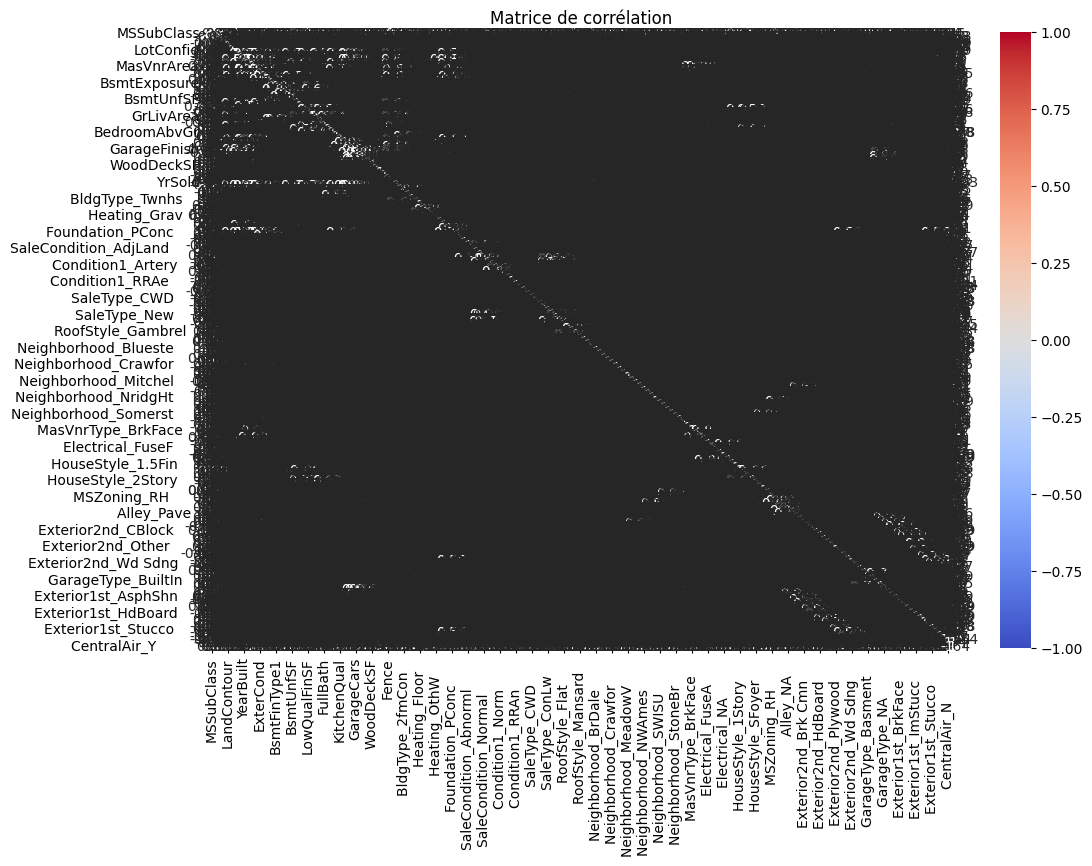


Prétraitement terminé. Les données sont prêtes pour l'entraînement du modèle.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import skew

# Charger les données
train = pd.read_csv("./final_data.csv")

# Vérifier les valeurs manquantes
missing_values = train.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

# Remplissage des valeurs manquantes (exemple avec la médiane)
train.fillna(train.median(), inplace=True)

# Vérification des statistiques de base
print("\nStatistiques descriptives :")
print(train.describe())

# Détection des outliers avec IQR
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
outliers = ((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).sum()
print("\nNombre d'outliers par colonne :")
print(outliers[outliers > 0])

# Visualisation des outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=train)
plt.xticks(rotation=90)
plt.title("Détection des outliers")
plt.show()

# Analyse de la corrélation
correlation_matrix = train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Matrice de corrélation")
plt.show()

# Vérification de la distribution des features
skewness = train.apply(lambda x: skew(x.dropna()))
print("\nAsymétrie des variables :")
print(skewness[abs(skewness) > 1])  # Variables fortement asymétriques

# Prétraitement : Séparation des features et target
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

# Encodage des variables catégorielles si nécessaire
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparer les données en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Tester un modèle robuste (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error (MSE) : {mse:.4f}')
print(f'R² Score : {r2:.4f}')

# Importance des variables
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
plt.title("Importance des variables")
plt.show()
